# Parkinson's Disease Prediction 
#### Based on ThetaYC PCoA of Oral and Nasal Microbiome Using Machine Learning

- MGnify : https://www.ebi.ac.uk/metagenomics/
- Mothur : https://mothur.org/

In [1]:
import PIL.Image as pilimg
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

## Download Data
https://www.ebi.ac.uk/metagenomics/studies/MGYS00002211

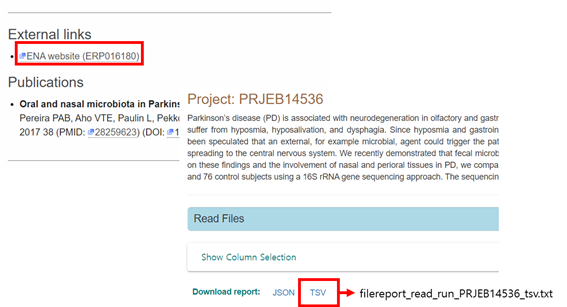

In [2]:
pilimg.open('./image01.png')

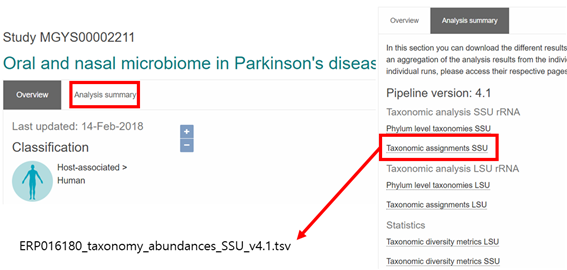

In [3]:
pilimg.open('./image02.png')

## Install Mothur
$ conda install -c bioconda mothur

## 필요한 Mothur 명령어
<p> mothur > rarefaction.single(shared=output.shared) </p>
<p> mothur > summary.single(shared=output.shared) </p>
<p> mothur > dist.shared(shared=output.shared, calc=thetayc-jclass, subsample=t) </p>
<p> mothur > pcoa(phylip=output.thetayc.MGnify.lt.ave.dist) </p>

## Data Analysis

In [4]:
report_df = pd.read_csv('./Data/filereport_read_run_PRJEB14536_tsv.txt', sep='\t')
report_df

run_accession study_accession sample_accession secondary_sample_accession  \
0      ERR1466857      PRJEB14536     SAMEA4044115                 ERS1215225   
1      ERR1466858      PRJEB14536     SAMEA4044116                 ERS1215226   
2      ERR1466859      PRJEB14536     SAMEA4044117                 ERS1215227   
3      ERR1466860      PRJEB14536     SAMEA4044118                 ERS1215228   
4      ERR1466861      PRJEB14536     SAMEA4044119                 ERS1215229   
..            ...             ...              ...                        ...   
279    ERR1467136      PRJEB14536     SAMEA4044394                 ERS1215504   
280    ERR1467137      PRJEB14536     SAMEA4044395                 ERS1215505   
281    ERR1467138      PRJEB14536     SAMEA4044396                 ERS1215506   
282    ERR1467139      PRJEB14536     SAMEA4044397                 ERS1215507   
283    ERR1467140      PRJEB14536     SAMEA4044398                 ERS1215508   

      tax_id                  scientific_name  \
0     447426            human oral metagenome   
1     447426            human oral metagenome   
2     447426            human oral metagenome   
3     447426            human oral metagenome   
4     447426            human oral metagenome   
..       ...                              ...   
279  1131769  human nasopharyngeal metagenome   
280  1131769  human nasopharyngeal metagenome   
281  1131769  human nasopharyngeal metagenome   
282  1131769  human nasopharyngeal metagenome   
283  1131769  human nasopharyngeal metagenome   

                                    study_alias  \
0    ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
1    ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
2    ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
3    ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
4    ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
..                                          ...   
279  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
280  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
281  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
282  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
283  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   

                                         submitted_ftp sample_alias  \
0    ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466857/P...           z1   
1    ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466858/P...           z2   
2    ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466859/P...           z3   
3    ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466860/P...           z4   
4    ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466861/P...           z5   
..                                                 ...          ...   
279  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1467136/P...         z280   
280  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1467137/P...         z281   
281  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1467138/P...         z282   
282  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1467139/P...         z283   
283  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1467140/P...         z284   

         sample_title  
0     oral microbiome  
1     oral microbiome  
2     oral microbiome  
3     oral microbiome  
4     oral microbiome  
..                ...  
279  nasal microbiome  
280  nasal microbiome  
281  nasal microbiome  
282  nasal microbiome  
283  nasal microbiome  

[284 rows x 10 columns]

In [5]:
# Labeling
target1 = 'Parkinson'
target2 = 'Control'

report_df['Label'] = np.nan
for i in range(report_df.shape[0]) : 
    label = report_df['submitted_ftp'].iloc[i].split('/')[5]
    if 'Parkinson-C' in label : 
        report_df['Label'].iloc[i] = target1
#         report_df['Sample'].iloc[i] = 'Oral'
    elif 'Parkinson-P' in label : 
        report_df['Label'].iloc[i] = target1
#         report_df['Sample'].iloc[i] = 'Oral'
    elif 'Parkinson_Nasal' in label : 
        if 'C' in label : 
            report_df['Label'].iloc[i] = target2
#             report_df['Sample'].iloc[i] = 'Nasal'
        elif 'P' in label : 
            report_df['Label'].iloc[i] = target2
#             report_df['Sample'].iloc[i] = 'Nasal'
        
report_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


run_accession study_accession sample_accession secondary_sample_accession  \
0    ERR1466857      PRJEB14536     SAMEA4044115                 ERS1215225   
1    ERR1466858      PRJEB14536     SAMEA4044116                 ERS1215226   
2    ERR1466859      PRJEB14536     SAMEA4044117                 ERS1215227   
3    ERR1466860      PRJEB14536     SAMEA4044118                 ERS1215228   
4    ERR1466861      PRJEB14536     SAMEA4044119                 ERS1215229   

   tax_id        scientific_name                                 study_alias  \
0  447426  human oral metagenome  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
1  447426  human oral metagenome  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
2  447426  human oral metagenome  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
3  447426  human oral metagenome  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   
4  447426  human oral metagenome  ena-STUDY-UH/IB-21-06-2016-10:36:04:388-75   

                                       submitted_ftp sample_alias  \
0  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466857/P...           z1   
1  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466858/P...           z2   
2  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466859/P...           z3   
3  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466860/P...           z4   
4  ftp.sra.ebi.ac.uk/vol1/run/ERR146/ERR1466861/P...           z5   

      sample_title      Label  
0  oral microbiome  Parkinson  
1  oral microbiome  Parkinson  
2  oral microbiome  Parkinson  
3  oral microbiome  Parkinson  
4  oral microbiome  Parkinson

In [6]:
def make_shared(input_tsv, output_shared) : 
    ssu_df = pd.read_csv(input_tsv, sep='\t') # input_tsv = './ERP016180_taxonomy_abundances_SSU_v4.1.tsv'
    ssu_df = ssu_df[1:].reset_index(drop=True)
    ssu_df['OTU'] = np.nan
    ssu_df['Bacteria'] = np.nan

    for i in range(ssu_df.shape[0]) : 
        if 'Bacteria' in ssu_df['#SampleID'].iloc[i] : 
            ssu_df['Bacteria'].iloc[i] = "Bacteria"

    ssu_df = ssu_df[ssu_df['Bacteria'] == 'Bacteria']
    ssu_df = ssu_df.reset_index(drop=True)
    ssu_df = ssu_df.iloc[:,:-1]

    for i in range(ssu_df.shape[0]) : 
        ssu_df['OTU'].iloc[i] = 'Otu' + str(str(int(i)+1).rjust(4, '0'))

    ssu_df_shared = ssu_df.iloc[:,1:-1].T
    ssu_df_shared = ssu_df_shared.rename(columns=ssu_df_shared.iloc[-1]).iloc[:-1,:]
    ssu_df_shared['numOtus'] = ssu_df_shared.sum(axis=1)
    ssu_df_shared = ssu_df_shared.astype('int')

    shared_df = pd.DataFrame(columns=['label', 'Group', 'numOtus'])

    for i in range(ssu_df_shared.shape[0]) : 
        shared_df = shared_df.append({'label' : 'MGnify', 
                                  'Group' : ssu_df_shared.index[i], 
                                  'numOtus' : ssu_df.shape[0]}, ignore_index=True)

    shared = pd.concat([shared_df, ssu_df_shared.iloc[:,:-1].reset_index(drop=True)], axis=1)
    shared = shared.astype({'numOtus' : int})

    shared.to_csv(output_shared, sep = '\t', index = False) # output_shared = './ERP016180_taxonomy_abundances.shared'

    return ssu_df, shared

In [7]:
ssu_df, shared = make_shared('./Data/ERP016180_taxonomy_abundances_SSU_v4.1.tsv', './Data/output.shared')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
ssu_df.head()

#SampleID  ERR1466857  ERR1466858  \
0  sk__Bacteria;k__;p__;c__;o__;f__;g__;s__Firmic...         0.0         0.0   
1  sk__Bacteria;k__;p__;c__;o__;f__;g__;s__Firmic...         0.0         0.0   
2  sk__Bacteria;k__;p__;c__;o__;f__;g__;s__Firmic...         0.0         0.0   
3  sk__Bacteria;k__;p__;c__;o__;f__;g__;s__SR1_ba...         0.0         0.0   
4  sk__Bacteria;k__;p__;c__;o__;f__;g__;s__agricu...         0.0         0.0   

   ERR1466859  ERR1466860  ERR1466861  ERR1466862  ERR1466863  ERR1466864  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         1.0         0.0         0.0   
3         0.0         6.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   ERR1466865  ...  ERR1467132  ERR1467133  ERR1467134  ERR1467135  \
0         0.0  ...         0.0         0.0         0.0         0.0   
1         0.0  ...         0.0         0.0         0.0         0.0   
2         0.0  ...         0.0         0.0         0.0         2.0   
3         0.0  ...         0.0         0.0         0.0         0.0   
4         0.0  ...         0.0         0.0         0.0         0.0   

   ERR1467136  ERR1467137  ERR1467138  ERR1467139  ERR1467140      OTU  
0         0.0         0.0         0.0         0.0         0.0  Otu0001  
1         0.0         0.0         0.0         0.0         0.0  Otu0002  
2         0.0         0.0         0.0         0.0         0.0  Otu0003  
3         0.0         0.0         0.0         0.0         0.0  Otu0004  
4         0.0         0.0         0.0         0.0         0.0  Otu0005  

[5 rows x 285 columns]

In [9]:
shared.head()

label       Group  numOtus  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  \
0  MGnify  ERR1466857     1914    0    0    0    0    0    0    0  ...    0   
1  MGnify  ERR1466858     1914    0    0    0    0    0    0    0  ...    0   
2  MGnify  ERR1466859     1914    0    0    0    0    0    0    0  ...    0   
3  MGnify  ERR1466860     1914    0    0    0    6    0    0    0  ...    0   
4  MGnify  ERR1466861     1914    0    0    0    0    0    0    0  ...    0   

   0.0  0.0  0.0  7.0  0.0  0.0  0.0  0.0  0.0  
0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0  

[5 rows x 1917 columns]

## Rarefaction Curve Plot

<p> Mothur를 이용해 output.shared 파일에서 output.groups.rarefaction 파일을 생성한다. </p>
<p> mothur > rarefaction.single(shared=output.shared) </p>

In [10]:
rarefaction = pd.read_csv('./Data/output.groups.rarefaction', sep='\t') 
rarefaction = rarefaction.iloc[:,[0]+list(range(1, rarefaction.shape[1], 3))]
rarefaction.columns = rarefaction.columns.str.replace('MGnify-', '')
rarefaction_df = rarefaction.iloc[:,1:]

label_df = pd.concat([report_df['run_accession'], report_df['Label']], axis=1)
label_df = label_df.sort_values(by=['run_accession'], axis=0)

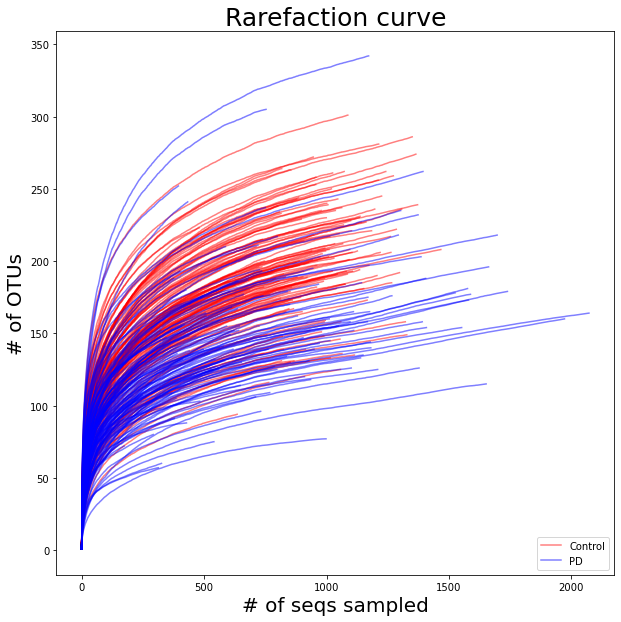

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
plt.title('Rarefaction curve', fontsize=25)
plt.xlabel('# of seqs sampled', fontsize=20)
plt.ylabel('# of OTUs', fontsize=20)

red = 0
blue = 0
for i in range(rarefaction_df.shape[1]) : 
    if list(label_df[label_df['run_accession'] == rarefaction_df.columns[i]]['Label'])[0] == 'Parkinson' : 
        plt.plot(rarefaction_df.iloc[:,i], color='red', alpha=0.5)
        red = i
    elif list(label_df[label_df['run_accession'] == rarefaction_df.columns[i]]['Label'])[0] == 'Control' : 
        plt.plot(rarefaction_df.iloc[:,i], color='blue', alpha=0.5)
        blue = i

line1, = plt.plot(0,0, color='red', alpha=0.5)
line2, = plt.plot(0,0, color='blue', alpha=0.5)
plt.legend(handles=(line1, line2), labels=('Control', 'PD'), loc='lower right')
plt.show()

## sobs, chao, simpson, shannon Matrix Plot

<p> summary.single 명령어를 “calc” 옵션 없이 실행한다. </p>
<p> mothur > summary.single(shared=output.shared) </p>

In [12]:
matrtix = pd.read_csv('./Data/output.groups.summary', sep='\t')
matrtix_df = pd.concat([matrtix['group'], 
                        matrtix['sobs'], 
                        matrtix['chao'], 
                        matrtix['simpson'], 
                        matrtix['shannon']], axis=1)

matrtix_df['Label'] = np.nan
for i in range(matrtix_df.shape[0]) : 
    matrtix_df['Label'].iloc[i] = list(label_df[label_df['run_accession'] == matrtix_df['group'].iloc[i]]['Label'])[0]

matrtix_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


group   sobs        chao   simpson   shannon      Label
0  ERR1466857  208.0  296.666667  0.145923  2.687906  Parkinson
1  ERR1466858  261.0  339.964286  0.093913  3.047466  Parkinson
2  ERR1466859  167.0  252.550000  0.445764  1.571606  Parkinson
3  ERR1466860  210.0  273.142857  0.187283  2.665951  Parkinson
4  ERR1466861  214.0  257.240000  0.157252  2.660610  Parkinson

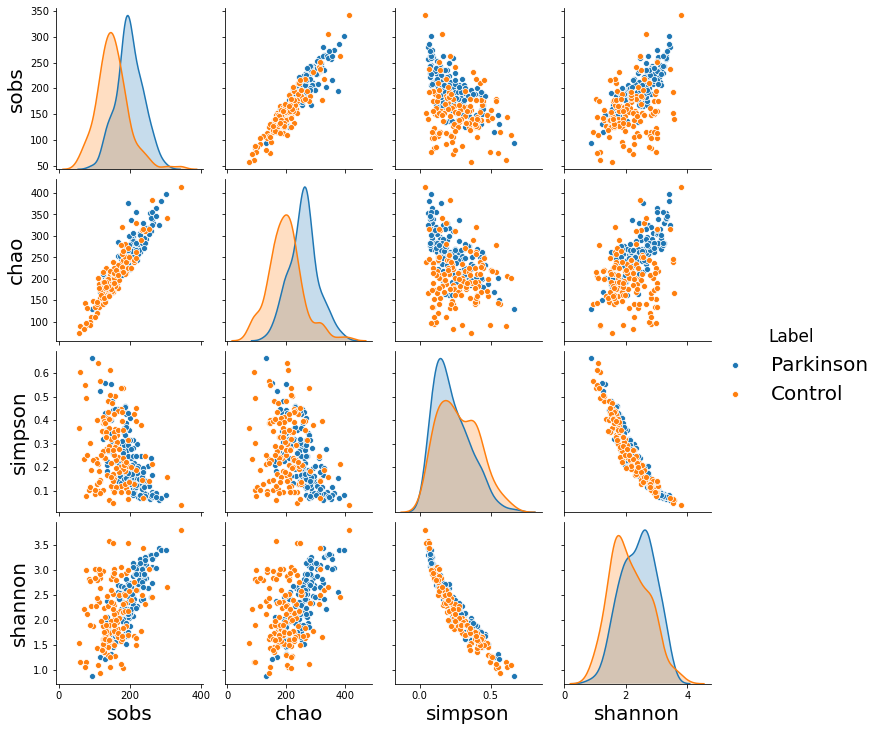

In [13]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
sns.pairplot(matrtix_df, hue="Label")

## ThetaYC PCoA

<p> mothur > dist.shared(shared=output.shared, calc=thetayc-jclass, subsample=t) </p>
<p> mothur > pcoa(phylip=output.thetayc.MGnify.lt.ave.dist) </p>

In [14]:
label_df = pd.concat([report_df['run_accession'], report_df['Label']], axis=1)
# label_df = pd.concat([report_df['run_accession'], report_df['Label'], report_df['Sample']], axis=1)
label_df = label_df.sort_values(by=['run_accession'], axis=0)
label_df.head()

run_accession      Label
0    ERR1466857  Parkinson
1    ERR1466858  Parkinson
2    ERR1466859  Parkinson
3    ERR1466860  Parkinson
4    ERR1466861  Parkinson

In [15]:
thetayc_pcoa = pd.read_csv('./Data/output.thetayc.MGnify.lt.ave.pcoa.axes', sep='\t')
thetayc_pcoa['Label'] = np.nan

# Join
for i in range(thetayc_pcoa.shape[0]) : 
    if thetayc_pcoa['group'].iloc[i] in list(label_df['run_accession']) : 
        thetayc_pcoa['Label'].iloc[i] = list(label_df[label_df['run_accession'] == thetayc_pcoa['group'].iloc[i]]['Label'])[0]

thetayc_pcoa

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


group     axis1     axis2     axis3     axis4     axis5     axis6  \
0    ERR1466857 -0.411342  0.023009 -0.111836 -0.049175  0.032019 -0.046189   
1    ERR1466858 -0.339015  0.011344 -0.256895 -0.074644 -0.015965 -0.300484   
2    ERR1466859 -0.394216  0.014995  0.249491  0.049699 -0.012628  0.014592   
3    ERR1466860 -0.427033  0.025092  0.015273 -0.014968  0.028550 -0.029547   
4    ERR1466861 -0.363533  0.011905 -0.115179 -0.048534 -0.008956 -0.111614   
..          ...       ...       ...       ...       ...       ...       ...   
277  ERR1467135  0.391738  0.300048  0.022955  0.063729  0.188479  0.000788   
278  ERR1467136  0.519989  0.288458  0.074557 -0.223574  0.029631 -0.001610   
279  ERR1467137  0.367384 -0.586291  0.044605 -0.082740  0.031897 -0.008663   
280  ERR1467138  0.351626 -0.607509  0.035914 -0.081061  0.014620 -0.002703   
281  ERR1467139  0.367549 -0.593497  0.037666 -0.074922  0.029940 -0.003439   

        axis7     axis8     axis9  ...   axis274   axis275   axis276  \
0    0.022787 -0.032184  0.014784  ... -0.017089  0.000080  0.056721   
1    0.079441 -0.022139  0.031577  ...  0.009463  0.001231  0.011733   
2   -0.004317  0.026322 -0.006706  ... -0.002388  0.001496 -0.006059   
3    0.022834  0.015924  0.008891  ...  0.002667 -0.001941  0.011324   
4    0.003450 -0.241533  0.032665  ... -0.010264  0.005379  0.115724   
..        ...       ...       ...  ...       ...       ...       ...   
277  0.003209 -0.013777  0.090534  ...  0.025429  0.011321  0.004409   
278 -0.043117  0.012319  0.051655  ...  0.002870 -0.021636 -0.010367   
279 -0.009381  0.000112 -0.031441  ... -0.039341  0.022639  0.004427   
280  0.011183 -0.000362 -0.000913  ...  0.012422  0.024602 -0.001498   
281  0.012411 -0.000697  0.008386  ... -0.019460  0.027108  0.001647   

      axis277   axis278   axis279   axis280   axis281  axis282      Label  
0    0.012145 -0.042855 -0.042923 -0.004676  0.000029      0.0  Parkinson  
1    0.001029  0.026834 -0.001331 -0.001060  0.000022      0.0  Parkinson  
2    0.002010 -0.003178  0.008900  0.001113  0.000023      0.0  Parkinson  
3   -0.000266 -0.044123 -0.002737 -0.002341  0.000034      0.0  Parkinson  
4    0.016344 -0.008297 -0.009654 -0.001910  0.000023      0.0  Parkinson  
..        ...       ...       ...       ...       ...      ...        ...  
277 -0.080975  0.002691 -0.003521 -0.031329  0.000022      0.0    Control  
278  0.070738  0.006736  0.005323 -0.032253  0.000026      0.0    Control  
279 -0.012279 -0.002749 -0.001721 -0.010669  0.000026      0.0    Control  
280  0.008746  0.000254 -0.000380 -0.020433  0.000026      0.0    Control  
281 -0.003680 -0.001460 -0.000481 -0.013915  0.000026      0.0    Control  

[282 rows x 284 columns]

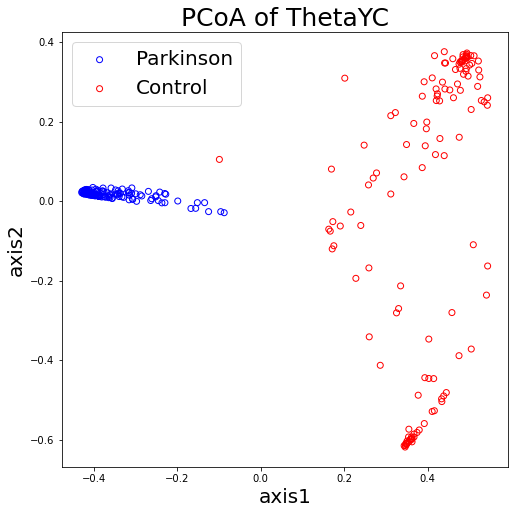

In [16]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.title('PCoA of ThetaYC', fontsize=25)
plt.xlabel('axis1', fontsize=20)
plt.ylabel('axis2', fontsize=20)
plt.scatter(thetayc_pcoa[thetayc_pcoa['Label'] == target1]['axis1'], 
            thetayc_pcoa[thetayc_pcoa['Label'] == target1]['axis2'], facecolors='none', edgecolors='blue')
plt.scatter(thetayc_pcoa[thetayc_pcoa['Label'] == target2]['axis1'], 
            thetayc_pcoa[thetayc_pcoa['Label'] == target2]['axis2'], facecolors='none', edgecolors='red')
plt.legend([target1, target2], loc='upper left')

## Prediction

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
X_train, X_test, y_train, y_test = train_test_split(thetayc_pcoa.iloc[:, 1:-1], 
                                                    thetayc_pcoa.iloc[:, -1:], 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=thetayc_pcoa['Label'])

len(X_train), len(y_train), len(X_test), len(y_test)

(211, 211, 71, 71)

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [24]:
classifier = DecisionTreeClassifier(criterion='entropy', splitter='random')
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

1.0


In [25]:
classifier = RandomForestClassifier(n_estimators=13)
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [22]:
classifier = GaussianNB(var_smoothing=0.5)
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
